# Análise de dados do Ocomon

## Os comando usados aqui seguem o tutorial da HackerLab

### Os dados aqui importados já estão tratatos e com os devidos novos campos adicionados

#### Bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns

In [2]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate("{0:.2f}".format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#### Carregando o arquivo:

In [3]:
# Import DataFrame
# if csv don't are split per ",", then we've to add a new args to method, 
# ex: read_csv('x.csv', sep=';')

#the pattern code to decode file in read_csv() method is utf-8
# if the file don't use this enconde, use enconding='cp1252'
df = pd.read_csv('ocomon_FINAL.csv')

In [4]:
#show the 5 first line from dataframe
df.head()

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
0,foi solicitado a manutencao de pontos de reded...,NaN,N.A,NaN,internet,teresina,jaclason machado veras,julia sousa santos,-999999,NP,...,9,15,18/4/2012,1,2,4,9,0,26/4/2012,sti_cca
1,computador nao liga sujeira e mau na memoria ...,NaN,hardware,ram,computador,teresina,secretaria do mestrado de piliticas publicas,luis carlos dos santos farias,140981,P,...,8,13,23/4/2014,2,2,4,9,4,23/4/2014,sti_cchl
2,meu computador esta ligando o monitor tb mas a...,NaN,hardware,monitor,monitor,teresina,gabinete do reitor 5511,constanca dolores lopes monteiro,-999999,P,...,15,43,24/10/2011,1,4,4,15,59,24/10/2011,sti_central
3,desabilite o envio de email como o servico de ...,utilize esta descricao de problema para proble...,N.A,NaN,e-mail,teresina,guilherme,guilherme avelino,-999999,NP,...,13,20,24/10/2011,1,4,4,17,6,26/10/2011,sti_central
4,instalacao de impressoras e remocao de virus ...,NaN,hardware,instalacao,impressora,teresina,NaN,bolsista nti,-999999,NP,...,12,13,24/10/2011,1,4,4,9,11,26/10/2011,sti_central


In [5]:
#show the last 5 line from the dataframe
df[df['OPEN_YEAR_4'] > 2][['DESCRIB','HAS_VALUE','ESPC']].sample(15).to_csv(r'analysis3.csv', index = False)
df[(df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_4'] > 2)][['DESCRIB','HAS_VALUE','ESPC']].sample(15).to_csv(r'analysis2.csv', index = False)

In [6]:
df.groupby('ESPC')['ESPC'].count()

ESPC
bateria              4
estabilizador        3
fonte              826
hd                 109
instalacao        1111
monitor              3
mouse                1
nobreak           1052
placa              419
placa de rede       49
placa de video       9
processador          1
ram                353
software          4993
usb                  2
Name: ESPC, dtype: int64

In [7]:
df[(df['HAS_VALUE'] == 'P') & (df['ESPC'].isna())][['DESCRIB','HAS_VALUE','ESPC','EQUIP']]

,DESCRIB,HAS_VALUE,ESPC,EQUIP
569,pc apitando daa abertura da maquina recolocaca...,P,NaN,computador
850,temos um computador na copese que hj nao ligou...,P,NaN,computador
912,possivel problema na placa de rede solucao par...,P,NaN,computador
1307,capacitor estufados solucao para este problem...,P,NaN,computador
1371,no break sem carga solucao para este problema...,P,NaN,nobreak
...,...,...,...,...
15495,trocar bateria bateria trocada manutencao de c...,P,NaN,computador
15544,o computador nao esta ligando foi realizado a...,P,NaN,computador
15726,troca de bateria foi realizada a troca da bate...,P,NaN,computador
15756,cpu esta problemasrecebido por joao pedro a so...,P,NaN,computador


In [8]:
df[(df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'instalacao')][['DESCRIB','HAS_VALUE','ESPC']]

,DESCRIB,HAS_VALUE,ESPC
4897,proreitoria de pesquis e posgraduacaosilmarlu...,P,instalacao


In [9]:
df[(df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'software')][['DESCRIB','HAS_VALUE','ESPC']]

,DESCRIB,HAS_VALUE,ESPC
660,problema na placamae troca de placamae e insta...,P,software
742,troca de placamae e instalacao de drivers e pr...,P,software
1192,nao tem nenhum programa instalado troca de mem...,P,software
1617,formatar e instalar linux substituicao de pla...,P,software
2913,foi efetuada uma solicitacao de suporte tecnic...,P,software
...,...,...,...
15562,nao ligawindows corrompidolocal unepesaberto p...,P,software
15635,problemas no adaptador de video vga so e possi...,P,software
15701,nao liga foi realizada a substituicao do hd f...,P,software
15711,nao ligatrocar bateriaaberto por gerisson troc...,P,software


In [10]:
df[(df['HAS_VALUE'] == 'NP') 
   & ((df['ESPC'] == 'ram')
   | (df['ESPC'] == 'hd')
   | (df['ESPC'] == 'fonte')
   | (df['ESPC'] == 'placa')
   | (df['ESPC'] == 'nobreak')
   | (df['ESPC'] == 'estabilizador')
   | (df['ESPC'] == 'placa de video')
   | (df['ESPC'] == 'placa de rede'))][['DESCRIB','HAS_VALUE','ESPC']].to_csv(r'analysis_err_NP.csv', index = False)

In [11]:
df[(df['HAS_VALUE'] == 'P') & (df['ESPC'].isna())][['DESCRIB','HAS_VALUE','ESPC', 'EQUIP']].to_csv(r'analysis_err.csv', index = False)

In [12]:
df[(df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'bateria')][['DESCRIB','HAS_VALUE','ESPC', 'EQUIP']]

,DESCRIB,HAS_VALUE,ESPC,EQUIP


In [13]:
((207+4+131)*100)/15802

2.164283002151626

In [14]:
#show how many registres has in each column
df.count()

DESCRIB          15802
PROB_ORIG         5853
PROB             15802
ESPC              8935
EQUIP            15692
I_NAME           15466
R_NAME           15433
C_NAME           15802
EQUIP_ID         15802
HAS_VALUE        15802
DEPARTMENT       15774
LOCALE           15583
OPEN_YEAR_4      15802
OPEN_MONTH_4     15802
OPEN_DAY_4       15802
HOUR_OPEN        15802
MIN_OPEN         15802
DATA_OPEN        15802
CLOSE_YEAR_4     15802
CLOSE_MONTH_4    15802
CLOSE_DAY_4      15802
HOUR_CLOSE       15802
MIN_CLOSE        15802
DATA_CLOSE       15802
STI              15774
dtype: int64

In [15]:
#describer the numerics collums
df.describe()

,EQUIP_ID,OPEN_YEAR_4,OPEN_MONTH_4,OPEN_DAY_4,HOUR_OPEN,MIN_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE
count,1.580200e+04,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000
mean,2.535997e+07,2.175990,2.384951,2.667384,12.067397,29.576699,1.736742,2.093532,2.304898,10.966523,25.963802
std,2.321736e+08,1.002167,1.131484,1.134959,2.984860,17.241296,1.282926,1.496906,1.547816,4.987646,18.575372
min,-9.999990e+05,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-9.999990e+05,1.000000,1.000000,2.000000,9.000000,15.000000,1.000000,1.000000,1.000000,9.000000,9.000000
50%,9.943000e+03,2.000000,2.000000,3.000000,11.000000,30.000000,2.000000,2.000000,3.000000,11.000000,26.000000
75%,1.424095e+05,3.000000,3.000000,4.000000,15.000000,44.000000,2.000000,3.000000,4.000000,15.000000,42.000000
max,2.147484e+09,4.000000,4.000000,4.000000,23.000000,59.000000,4.000000,4.000000,4.000000,23.000000,59.000000


In [16]:
#show the type that pandas indentified to each collums
# df.dtypes

### Gráficos

In [17]:
%matplotlib inline

In [18]:
years_open = []
months_open = []
days_open = []

years_close = []
months_close = []
days_close = []
for D_open, D_close, H_close in df[['DATA_OPEN','DATA_CLOSE','HOUR_CLOSE']].values.tolist():
    dtO = datetime.strptime(D_open, '%d/%m/%Y')
    years_open.append(dtO.year)
    months_open.append(dtO.month)
    days_open.append(dtO.day)
    if H_close == -1:
        years_close.append('NaN')
        months_close.append('NaN')
        days_close.append('NaN')
    else:
        dtC = datetime.strptime(D_close, '%d/%m/%Y')
        years_close.append(dtC.year)
        months_close.append(dtC.month)
        days_close.append(dtC.day)

In [19]:
df['OPEN_YEAR_1'] = years_open
df['OPEN_MONTH_1'] = months_open
df['OPEN_DAY_1'] = days_open

df['CLOSE_YEAR_1'] = years_close
df['CLOSE_MONTH_1'] = months_close
df['CLOSE_DAY_1'] = days_close

In [20]:
#How many problems were opens in each year_4
df['OPEN_YEAR_4'].value_counts(sort=False) 

1    4492
2    6334
3    2679
4    2297
Name: OPEN_YEAR_4, dtype: int64

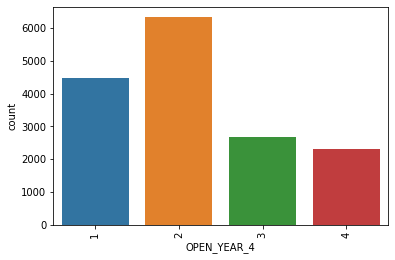

In [21]:
#show the graphic bars to above result 
df['OPEN_YEAR_4'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_YEAR_4'])

In [22]:
#How many problems were opens in each year
df['OPEN_YEAR_1'].value_counts(sort=True)

2013    3708
2012    3680
2014    2626
2015    1567
2017    1165
2016    1112
2011     812
2018     772
2019     360
Name: OPEN_YEAR_1, dtype: int64

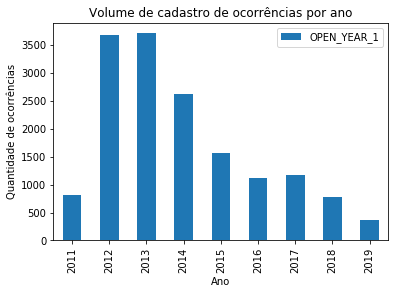

In [23]:
# sns.countplot(df['OPEN_YEAR_1'])
plt.title("Volume de cadastro de ocorrências por ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de ocorrências")
df['OPEN_YEAR_1'].value_counts().sort_index().plot.bar()
plt.legend()
plt.savefig('foo1.png')

### Apartir de 2015 o gráfico mostra um redução e estabilização. Antes disso o número de ocorrências eram muito acima dos valores atuais

In [24]:
#How many problems were opens in each months
df['OPEN_MONTH_4'].value_counts()

1    4659
2    3986
4    3585
3    3572
Name: OPEN_MONTH_4, dtype: int64

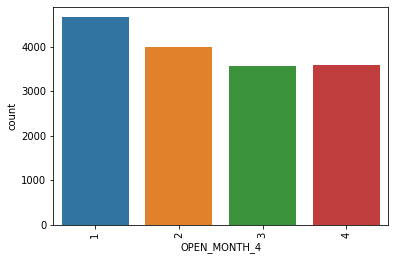

In [25]:
# show the graphic bars to above result
# df['D_MOTH_OPEN'].apply(lambda x: 0 if x == 99 else x).value_counts().sort_index().plot.bar()
df['OPEN_MONTH_4'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_MONTH_4'])

In [26]:
#How many problems were opens in each months
df['OPEN_MONTH_1'].value_counts()

3     1748
11    1592
1     1487
4     1462
2     1424
5     1411
9     1244
8     1239
6     1113
7     1089
10    1064
12     929
Name: OPEN_MONTH_1, dtype: int64

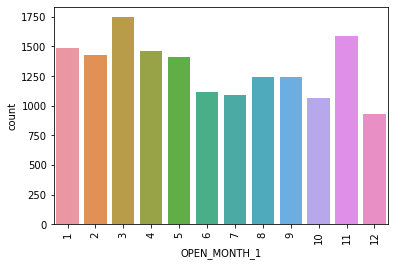

In [27]:
df['OPEN_MONTH_1'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_MONTH_1'])

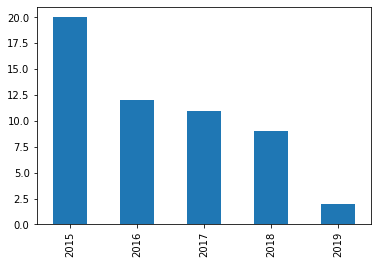

In [28]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().plot.bar()

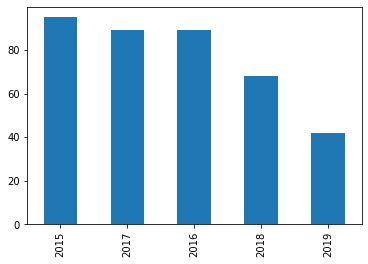

In [29]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().plot.bar()

Text(0, 0.5, 'Setor')

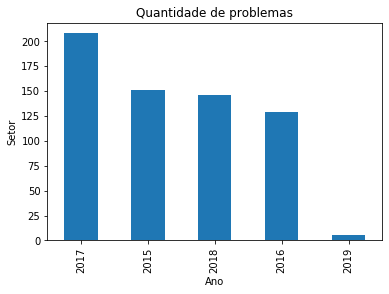

In [30]:
df[(df['OPEN_YEAR_1'] >= 2015) 
   & (df['HAS_VALUE'] == 'P') 
   & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().plot.bar()
plt.title("Quantidade de problemas")
plt.xlabel("Ano")
plt.ylabel("Setor")

In [31]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P')].groupby(['ESPC'])['ESPC'].count()

ESPC
fonte             383
hd                 54
nobreak           640
placa             132
placa de rede      13
placa de video      3
ram                61
software           39
Name: ESPC, dtype: int64

In [32]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P')].groupby(['EQUIP'])['EQUIP'].count()

EQUIP
computador       739
estabilizador      1
impressora         2
nobreak          639
Name: EQUIP, dtype: int64

In [33]:
print('min of troubles in hd since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().min())
print('min of troubles in fonte since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().min())
print('min of troubles in ram since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().min())
print('min of troubles in placa since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().min())
print('min of troubles in bateria since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().min())
print('min of troubles in placa de rede since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().min())
print('min of troubles in placa de video since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().min())
print('min of troubles in nobreak since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().min())
print('min of troubles in cabo since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().min())

min of troubles in hd since 2015:  2
min of troubles in fonte since 2015:  42
min of troubles in ram since 2015:  1
min of troubles in placa since 2015:  13
min of troubles in bateria since 2015:  nan
min of troubles in placa de rede since 2015:  1
min of troubles in placa de video since 2015:  1
min of troubles in nobreak since 2015:  5
min of troubles in cabo since 2015:  nan


In [34]:
#How many problems were opens in each days
df['OPEN_DAY_4'].value_counts()

4    5133
2    3809
3    3570
1    3290
Name: OPEN_DAY_4, dtype: int64

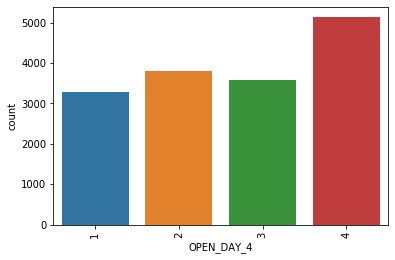

In [35]:
#show the graphic bars to above result 
df['OPEN_DAY_4'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_DAY_4'])

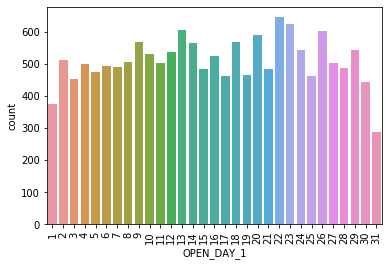

In [36]:
#show the graphic bars to above result 
df['OPEN_DAY_1'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_DAY_1'])

Text(0, 0.5, 'Quantidade de ocorrências')

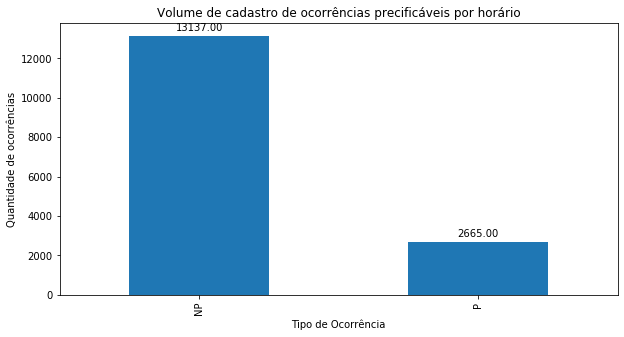

In [37]:
ndf = df['HAS_VALUE'].value_counts()

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências precificáveis por horário")
plt.xlabel("Tipo de Ocorrência")
plt.ylabel("Quantidade de ocorrências")

In [38]:
((8105+2958)*100)/15802

70.01012530059486

In [39]:
# PERCENT OF MISSING PRICING VALUES IN ALL DATASET
(df['HAS_VALUE'].isna().sum() / df['DESCRIB'].count()) * 100

0.0

Text(0, 0.5, 'Quantidade de ocorrências')

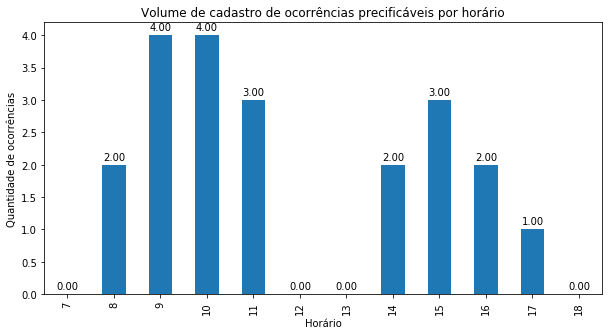

In [40]:
#show the graphic bars to above result 
ndf = round(df[((df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015))]['HOUR_OPEN'].value_counts().sort_index()/5/12)

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências precificáveis por horário")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

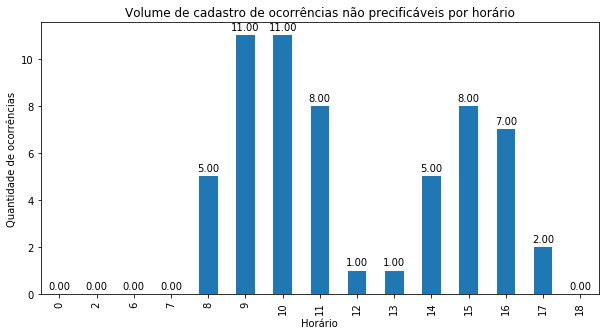

In [41]:
#show the graphic bars to above result 
ndf = round(df[((df['HAS_VALUE'] != 'P') & (df['OPEN_YEAR_1'] >= 2015))]['HOUR_OPEN'].value_counts().sort_index()/5/12)

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências não precificáveis por horário")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

In [42]:
#show the graphic bars to above result 
ndf = round(df[(df['OPEN_YEAR_1'] >= 2015)]['HOUR_OPEN'].value_counts().sort_index()/5/12)

Text(0, 0.5, 'Quantidade de ocorrências')

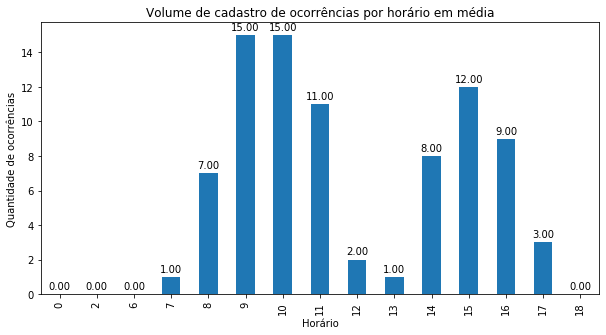

In [43]:
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

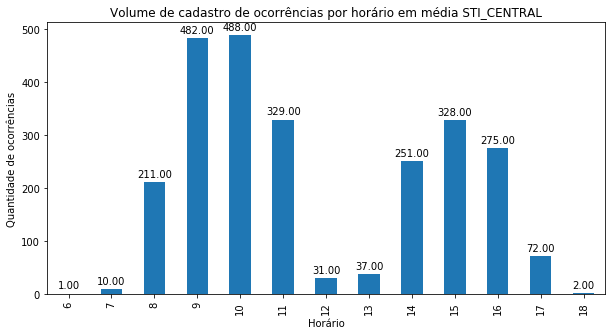

In [44]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_central'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média STI_CENTRAL")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

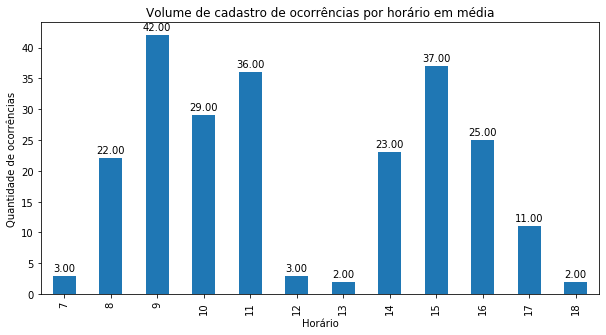

In [45]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_cchl'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

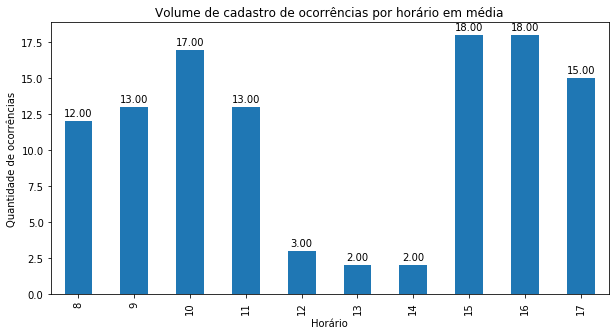

In [46]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_ct'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

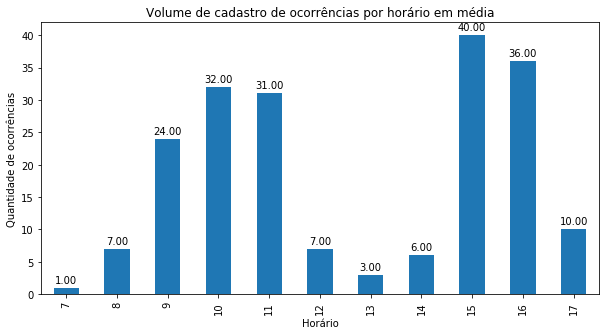

In [47]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_cce'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

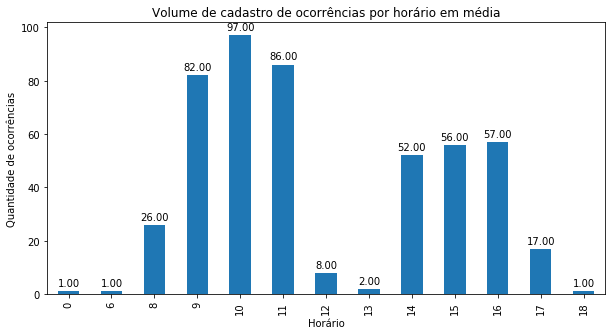

In [48]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_cca'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

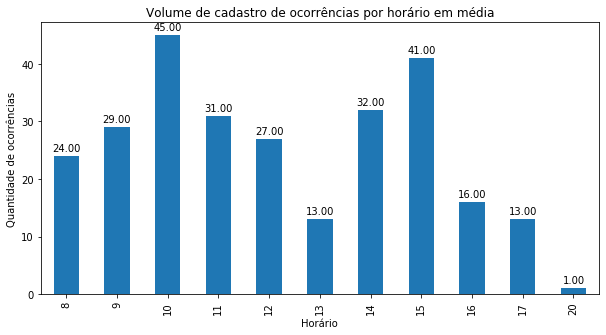

In [49]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_biblioteca') | (df['STI'] == 'biblioteca'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

### O turno da manhã contem maior fluxo de ocorrencias, em destaque os horarios de 10 as 12. A tarde, as 15h, ocorre um pico, porem menos relevante em comparação com o turno da manhã.

Text(0, 0.5, 'Quantidade de ocorrências')

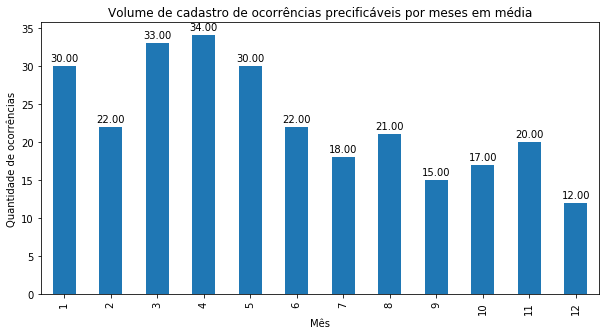

In [50]:
#show the graphic bars to above result 
ndf = round(df[((df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015))]['OPEN_MONTH_1'].value_counts().sort_index()/5)

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências precificáveis por meses em média")
plt.xlabel("Mês")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

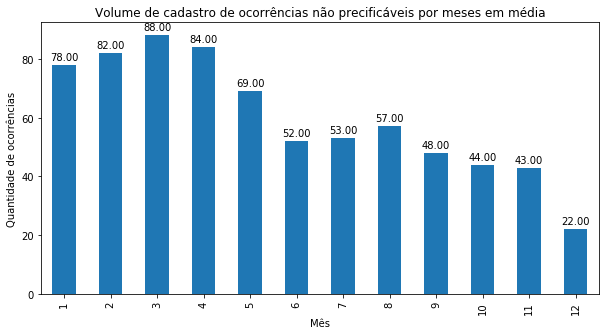

In [51]:
#show the graphic bars to above result 
ndf = round(df[((df['HAS_VALUE'] != 'P') & (df['OPEN_YEAR_1'] >= 2015))]['OPEN_MONTH_1'].value_counts().sort_index()/5)

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências não precificáveis por meses em média")
plt.xlabel("Mês")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

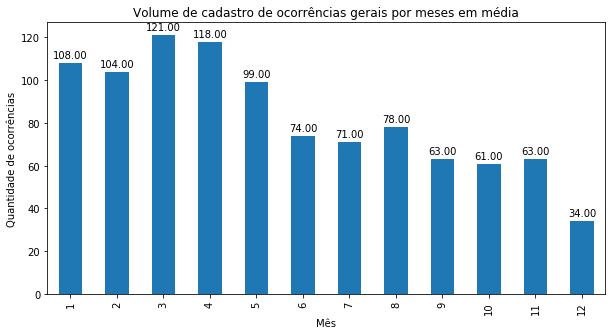

In [52]:
#show the graphic bars to above result 
ndf = round(df[(df['OPEN_YEAR_1'] >= 2015)]['OPEN_MONTH_1'].value_counts().sort_index()/5)

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências gerais por meses em média")
plt.xlabel("Mês")
plt.ylabel("Quantidade de ocorrências")

In [53]:
df[['DATA_OPEN','DATA_CLOSE','HOUR_OPEN','HOUR_CLOSE','MIN_OPEN','MIN_CLOSE']]

,DATA_OPEN,DATA_CLOSE,HOUR_OPEN,HOUR_CLOSE,MIN_OPEN,MIN_CLOSE
0,18/4/2012,26/4/2012,9,9,15,0
1,23/4/2014,23/4/2014,8,9,13,4
2,24/10/2011,24/10/2011,15,15,43,59
3,24/10/2011,26/10/2011,13,17,20,6
4,24/10/2011,26/10/2011,12,9,13,11
...,...,...,...,...,...,...
15797,13/9/2019,17/9/2019,15,8,23,21
15798,13/9/2019,13/9/2019,16,17,21,47
15799,16/9/2019,99/99/9999,16,-1,31,-1
15800,17/9/2019,99/99/9999,17,-1,35,-1


In [54]:
hour_efic = []
for D_open, D_close, H_open, H_close, M_open, M_close  in df[['DATA_OPEN','DATA_CLOSE','HOUR_OPEN','HOUR_CLOSE','MIN_OPEN','MIN_CLOSE']].values.tolist():
    if H_close == -1:
        hour_efic.append(-1)
    else:
        dtO = datetime.strptime(D_open +" "+ str(H_open) +" "+ str(M_open), '%d/%m/%Y %H %M')
        dtC = datetime.strptime(D_close +" "+ str(H_close) +" "+ str(M_close), '%d/%m/%Y %H %M')
        hour_efic.append(((dtO - dtC).seconds/60)/60)

In [55]:
df['HOUR_EFIC'] = hour_efic
df['HOUR_EFIC']

0         0.250000
1        23.150000
2        23.733333
3        20.233333
4         3.033333
           ...    
15797     7.033333
15798    22.566667
15799    -1.000000
15800    -1.000000
15801    -1.000000
Name: HOUR_EFIC, Length: 15802, dtype: float64

In [56]:
# min of wasted time to solve a problem in general
df[df['HOUR_EFIC'] > 0]['HOUR_EFIC'].min()

0.016666666666666666

In [57]:
# min of wasted time to solve a problem in general
df[(df['HOUR_EFIC'] > 0) & (df['STI'] != '0')].groupby(['STI'])['HOUR_EFIC'].min()

STI
biblioteca        0.016667
campus            0.066667
hu                0.950000
sti_biblioteca    0.166667
sti_cca           0.016667
sti_cce           0.050000
sti_cchl          0.016667
sti_central       0.016667
sti_ct            0.033333
Name: HOUR_EFIC, dtype: float64

In [58]:
# min of wasted time to solve a problem in general
ndf = df[(df['HOUR_EFIC'] > 0) & (df['STI'] != '0')].groupby(['STI', 'ESPC'])['HOUR_EFIC'].min()

In [59]:
ndf

STI         ESPC         
biblioteca  fonte            0.733333
            hd               1.666667
            instalacao       1.466667
            nobreak          5.433333
            placa            1.483333
                               ...   
sti_ct      nobreak          2.416667
            placa            0.033333
            placa de rede    7.366667
            ram              2.100000
            software         0.050000
Name: HOUR_EFIC, Length: 71, dtype: float64

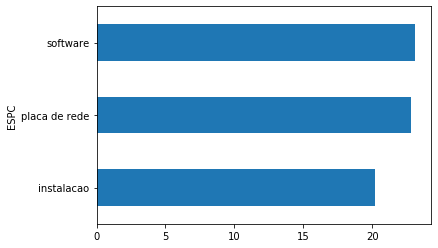

In [60]:
ndf['sti_biblioteca'].plot.barh()

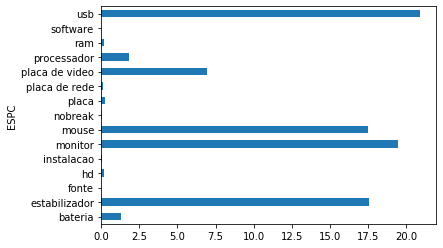

In [61]:
ndf['sti_central'].plot.barh()

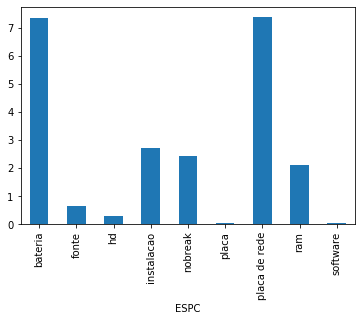

In [62]:
ndf['sti_ct'].plot.bar()

## Media de tempo gasto, por cada setor do STI, em relação a conclusão de problemas precificáveis

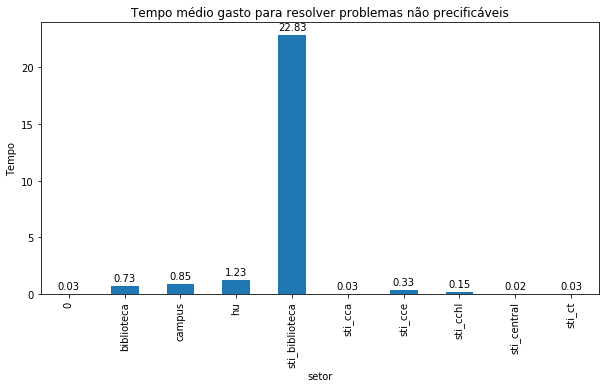

In [63]:
# min of wasted time to solve a princify problem 
ndf = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P')].groupby('STI')['HOUR_EFIC'].min()

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
plt.title("Tempo médio gasto para resolver problemas não precificáveis")
plt.xlabel("setor")
plt.ylabel("Tempo")

autolabel(ax.patches)

Text(0, 0.5, 'Quantidade de ocorrências')

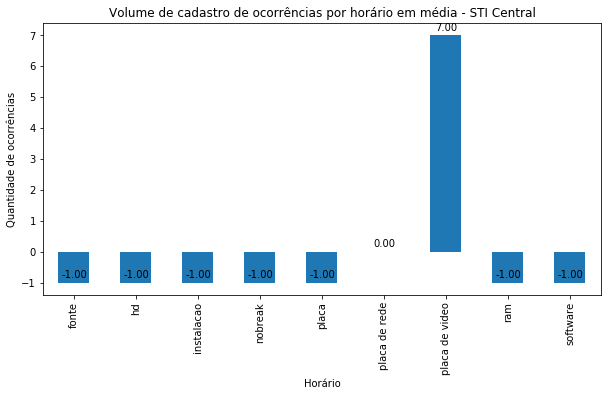

In [64]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_central'))].groupby('ESPC')['HOUR_EFIC'].min())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média - STI Central")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

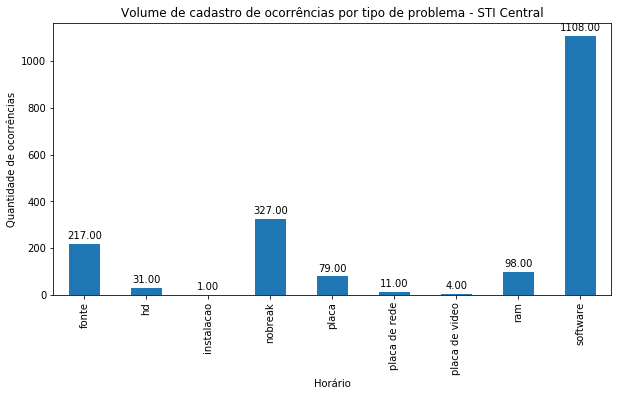

In [65]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_central'))].groupby('ESPC')['ESPC'].count())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por tipo de problema - STI Central")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

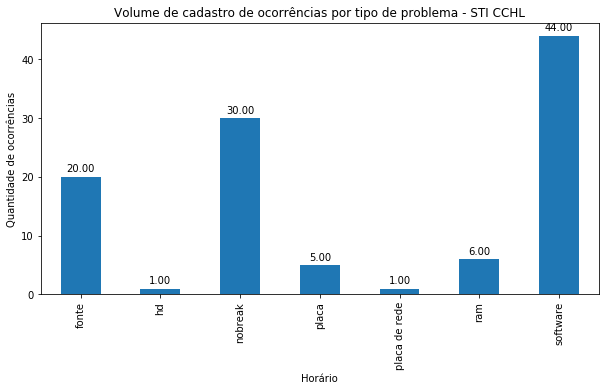

In [66]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_cchl'))].groupby('ESPC')['ESPC'].count())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por tipo de problema - STI CCHL")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

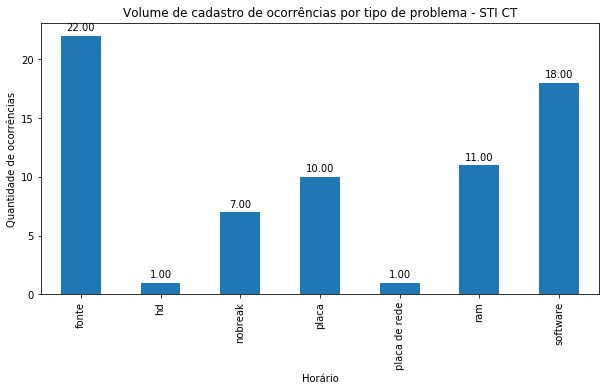

In [67]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_ct'))].groupby('ESPC')['ESPC'].count())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por tipo de problema - STI CT")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

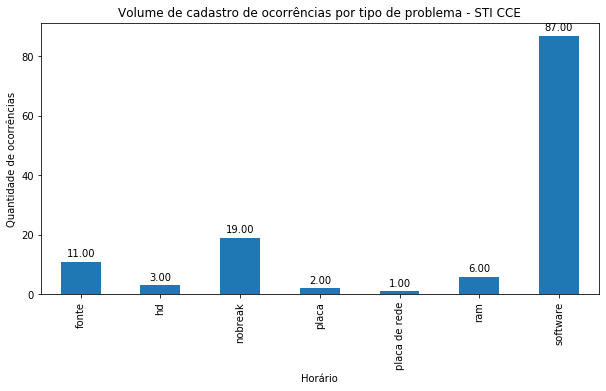

In [68]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_cce'))].groupby('ESPC')['ESPC'].count())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por tipo de problema - STI CCE")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

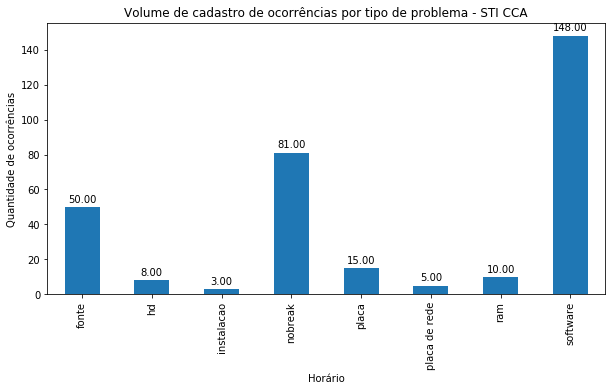

In [69]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_cca'))].groupby('ESPC')['ESPC'].count())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por tipo de problema - STI CCA")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

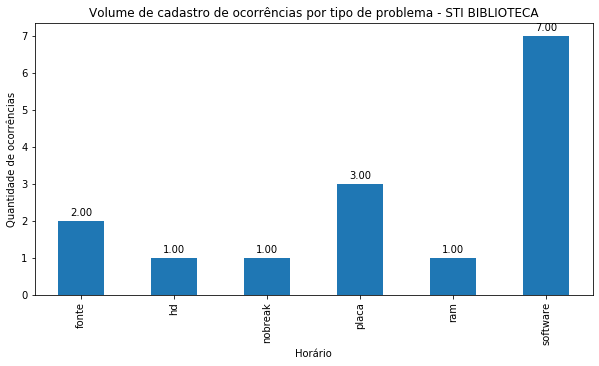

In [70]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'biblioteca'))].groupby('ESPC')['ESPC'].count())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por tipo de problema - STI BIBLIOTECA")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

### Número de ocorrências não encerradas por tipo de equipamento

In [71]:
df[(df['HOUR_EFIC'] < 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['STI'].value_counts().sort_index()

sti_central    3
Name: STI, dtype: int64

In [72]:
df[(df['HOUR_EFIC'] < 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['STI'].value_counts().sort_index()

0              13
campus          2
sti_cca         3
sti_cce         2
sti_cchl        4
sti_central    23
sti_ct          7
Name: STI, dtype: int64

In [73]:
df[(df['HOUR_EFIC'] < 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['STI'].value_counts().sort_index()

Series([], Name: STI, dtype: int64)

In [74]:
hd = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['STI'].value_counts().sort_index()
fonte = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['STI'].value_counts().sort_index()
bateria = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['STI'].value_counts().sort_index()
ram = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['STI'].value_counts().sort_index()
placaR = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['STI'].value_counts().sort_index()
placaV = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['STI'].value_counts().sort_index()
placaM = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['STI'].value_counts().sort_index()
cabo = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['STI'].value_counts().sort_index()
nobreak = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['STI'].value_counts().sort_index()
estabilizador = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['STI'].value_counts().sort_index()

In [75]:
hd

0              12
biblioteca      1
sti_cca         7
sti_cce         2
sti_cchl        1
sti_central    27
sti_ct          1
Name: STI, dtype: int64

Text(0.5, 0, 'Especificação')

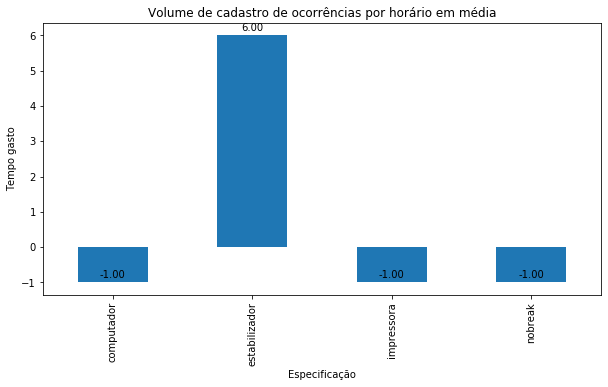

In [76]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P'))].groupby('EQUIP')['HOUR_EFIC'].min())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.ylabel("Tempo gasto")
plt.xlabel("Especificação")

In [77]:
ndf = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] != 'P')].groupby('STI')['HOUR_EFIC'].min()

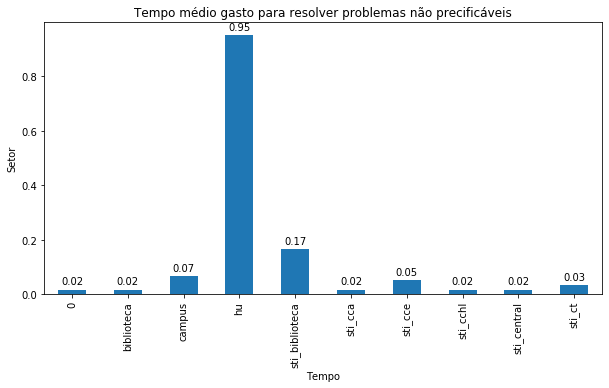

In [78]:
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
plt.title("Tempo médio gasto para resolver problemas não precificáveis")
plt.xlabel("Tempo")
plt.ylabel("Setor")

autolabel(ax.patches)

In [79]:
ndf = df[df['HOUR_EFIC'] > 0].groupby('STI')['HOUR_EFIC'].min()

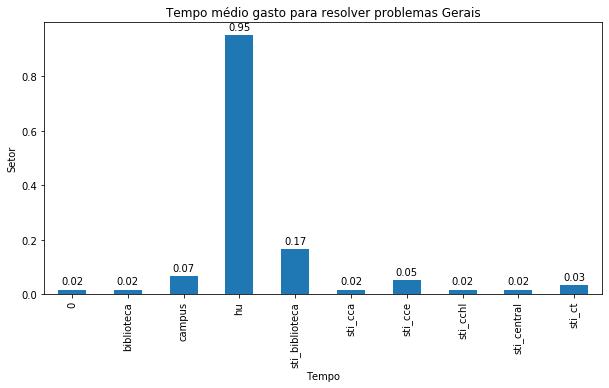

In [80]:
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
plt.title("Tempo médio gasto para resolver problemas Gerais")
plt.xlabel("Tempo")
plt.ylabel("Setor")

autolabel(ax.patches)

In [81]:
# DEPARTMENT LOCALE
df['DEPARTMENT'].value_counts()

0                2617
ccn              2175
ccs              1977
cca              1487
cchl             1237
prad             1037
cce               862
ct                607
administracao     600
campus            425
preg              416
praec             378
nti               369
prppg             290
biblioteca        272
prex              219
proplan           160
cead              109
tropen            105
fadex              96
hu                 95
juizado            63
nintec             55
parfor             49
dce                36
ntf                27
noe                11
Name: DEPARTMENT, dtype: int64

## Quantidade Média, minima e máxima de cada produtor precificável agrupada por ano

In [82]:
df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015)]['ESPC'].value_counts()

fonte             325
nobreak           167
placa             100
ram                59
hd                 51
software           37
placa de rede      13
placa de video      3
Name: ESPC, dtype: int64

### software não deveria esta na lista de problemas precificáveis

In [83]:
df[(df['HOUR_EFIC'] > 0) 
   & (df['HAS_VALUE'] == 'P') 
   & (df['OPEN_YEAR_1'] >= 2015) 
   & (df['ESPC'] == 'software')
  ]['DESCRIB']

11052    problema na conexao vga da placa de video onbo...
11090    nao ligaformatar e instalar programas solucao ...
11340    problema na placa de video local nes posta out...
11342    computador reiniciando e aparecendo uma tela a...
11662    nao inicia computador formatado e instalado pl...
11708    placa de rede danificada e fazer o backup para...
12476    ja e a terceira vez que mando a cpu para conse...
12639    desliga sozinho computador nao apresenta erros...
12669    nao esta dando video e nem saindo somlocal pre...
12727    nao ligachamado hp 4653907913 hd trocado pela ...
12739    executando diagnostico epsa da dell apresentou...
12874    verificar bateriainstalar programa libreoffice...
12927    o notebook nao esta iniciando corretamente ver...
12931    tela azul na instalacao do windows  maquina fo...
13076    computador necessita instalacao de placa wirel...
13179    lento e incompativel para a instalacao do cert...
13509    computador nao detecta rede  dessa forma foi i.

### Pode-se verificar que as 24 ocorrencias de software **precificáveis** são de fato precificáveis porem a `class ESPC` **não** as classificou corretamente

In [84]:
hd = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().sort_index()
fonte = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().sort_index()
bateria = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().sort_index()
ram = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().sort_index()
placaR = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().sort_index()
placaV = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().sort_index()
placaM = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().sort_index()
cabo = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().sort_index()
nobreak = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().sort_index()
estabilizador = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_YEAR_1'].value_counts().sort_index()
# print(hd)
# print(fonte)
# print(bateria)
# print(ram)
# print(placaR)
# print(placaV)
# print(placaM)
# print(cabo)
# print(nobreak)
# print(estabilizador)

## Produtos como cabo, estabilizadores e placas de video não apresentam valores expressivos

In [85]:
plt.rcParams['figure.figsize'] = (10,5)

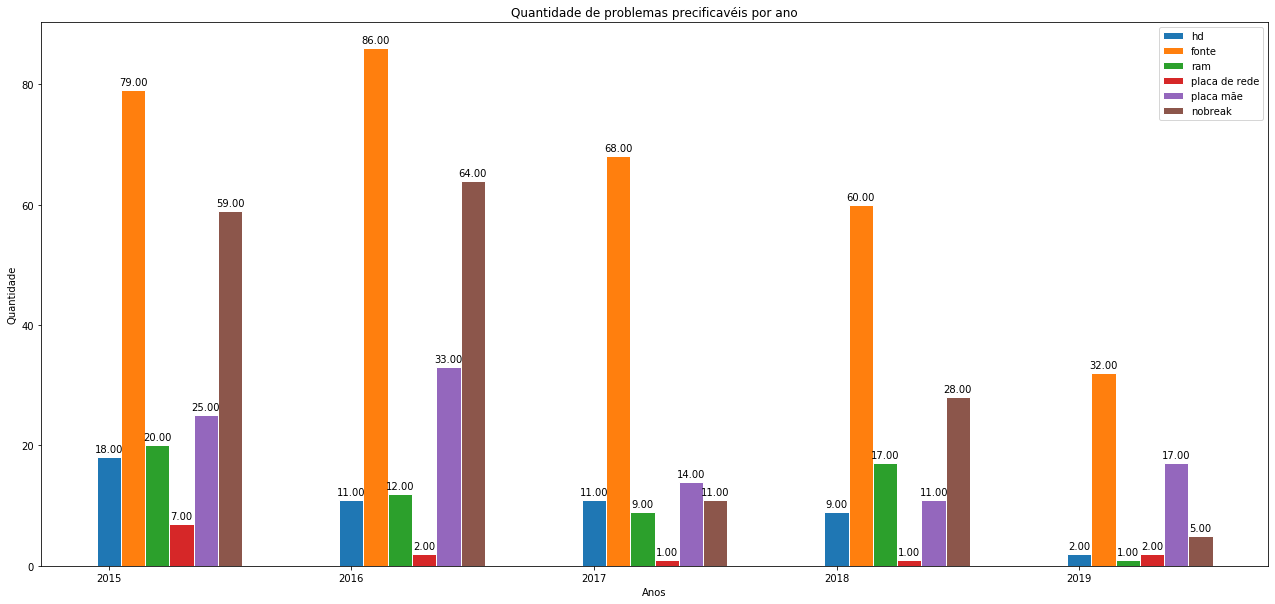

In [86]:
plt.rcParams['figure.figsize'] = (22,10)
barWidth = 0.1  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r4]
#r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r6]
#r9 = [x + barWidth for x in r8]

fig, ax = plt.subplots()
rects1 = ax.bar(r1, hd.values.tolist(), width=barWidth, edgecolor='white', label='hd')
rects2 = ax.bar(r2, fonte.values.tolist(), width=barWidth, edgecolor='white', label='fonte')
rects3 = ax.bar(r3, ram.values.tolist(), width=barWidth, edgecolor='white', label='ram')
rects4 = ax.bar(r4, placaR.values.tolist(), width=barWidth, edgecolor='white', label='placa de rede')
#rects5 = ax.bar(r5, placaV.values.tolist(), width=barWidth, edgecolor='white', label='placa de video')
rects6 = ax.bar(r6, placaM.values.tolist(), width=barWidth, edgecolor='white', label='placa mãe')
#rects7 = ax.bar(r7, cabo.values.tolist(), width=barWidth, edgecolor='white', label='cabos em geral')
rects8 = ax.bar(r8, nobreak.values.tolist(), width=barWidth, edgecolor='white', label='nobreak')
#rects9 = ax.bar(r9, estabilizador.values.tolist(), width=barWidth, edgecolor='white', label='estabilizador')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
#autolabel(rects5)
autolabel(rects6)
#autolabel(rects7)
autolabel(rects8)
#autolabel(rects9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_xlabel('Anos')
ax.set_title('Quantidade de problemas precificavéis por ano')
ax.set_xticklabels(['x','2015', '2016', '2017', '2018', '2019'])
ax.legend()
plt.savefig('foo.png')

In [87]:
hd = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_MONTH_1'].value_counts().sort_index()/5
fonte = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_MONTH_1'].value_counts().sort_index()/5
bateria = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_MONTH_1'].value_counts().sort_index()/5
ram = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_MONTH_1'].value_counts().sort_index()/5
placaR = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_MONTH_1'].value_counts().sort_index()/5
placaV = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_MONTH_1'].value_counts().sort_index()/5
placaM = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_MONTH_1'].value_counts().sort_index()/5
cabo = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_MONTH_1'].value_counts().sort_index()/5
nobreak = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_MONTH_1'].value_counts().sort_index()/5
estabilizador = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_MONTH_1'].value_counts().sort_index()/5
print(hd)
# print(fonte)
# print(bateria)
# print(ram)
# print(placaR)
# print(placaV)
# print(placaM)
# print(cabo)
# print(nobreak)
# print(estabilizador)

1     0.4
2     0.4
3     2.2
4     1.4
5     1.2
6     1.6
7     0.6
8     0.2
9     0.6
10    0.6
11    0.6
12    0.4
Name: OPEN_MONTH_1, dtype: float64


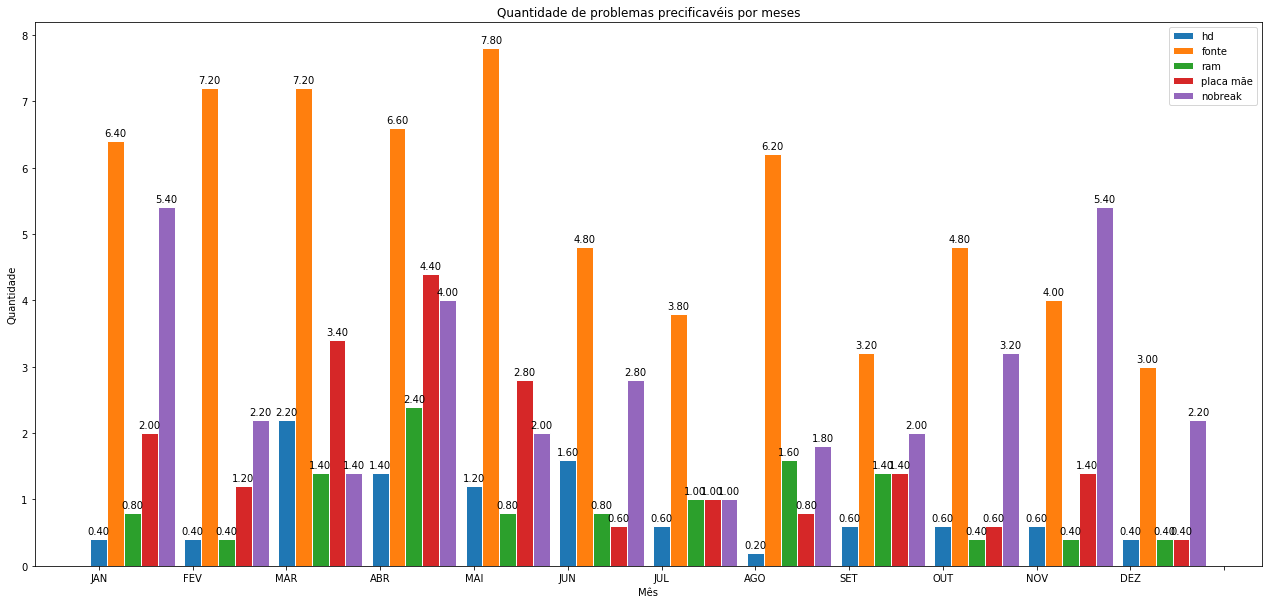

In [88]:
plt.rcParams['figure.figsize'] = (22,10)
barWidth = 0.18  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(12)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r3]
#r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r6]
#r9 = [x + barWidth for x in r8]

fig, ax = plt.subplots()
rects1 = ax.bar(r1, hd.values.tolist(), width=barWidth, edgecolor='white', label='hd')
rects2 = ax.bar(r2, fonte.values.tolist(), width=barWidth, edgecolor='white', label='fonte')
rects3 = ax.bar(r3, ram.values.tolist(), width=barWidth, edgecolor='white', label='ram')
# rects4 = ax.bar(r4, placaR.values.tolist(), width=barWidth, edgecolor='white', label='placa de rede')
#rects5 = ax.bar(r5, placaV.values.tolist(), width=barWidth, edgecolor='white', label='placa de video')
rects6 = ax.bar(r6, placaM.values.tolist(), width=barWidth, edgecolor='white', label='placa mãe')
#rects7 = ax.bar(r7, cabo.values.tolist(), width=barWidth, edgecolor='white', label='cabos em geral')
rects8 = ax.bar(r8, nobreak.values.tolist(), width=barWidth, edgecolor='white', label='nobreak')
#rects9 = ax.bar(r9, estabilizador.values.tolist(), width=barWidth, edgecolor='white', label='estabilizador')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
#autolabel(rects4)
#autolabel(rects5)
autolabel(rects6)
#autolabel(rects7)
autolabel(rects8)
#autolabel(rects9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_xlabel('Mês')
ax.set_title('Quantidade de problemas precificavéis por meses')
ax.set_xticks((0,1,2,3,4,5,6,7,8,9,10,11,12))
ax.set_xticklabels(['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ'])
ax.legend()

## Definição dos mínimos

In [98]:
hd_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().min())
fonte_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().min())
# bateria_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().min())
ram_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().min())

In [99]:
placaR_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().min())
placaV_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().min())
placaM_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().min())

In [101]:
fonte_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().min())
# bateria_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().min())
ram_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().min())
placaR_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().min())
placaV_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().min())
placaM_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().min())
# cabo_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().min())
nobreak_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().min())
estabilizador_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_YEAR_1'].value_counts().min())

## Definição das médias

In [102]:
hd_mid = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().mean())
fonte_mid = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().mean())
# bateria_mid = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().mean())
ram_mid = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().mean())
placaR_mid = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().mean())
placaV_mid = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().mean())
placaM_mid = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().mean())
# cabo_mid = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().mean())
nobreak_mid = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().mean())
estabilizador_mid = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_YEAR_1'].value_counts().mean())

## Definição dos máximos

In [103]:
hd_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().max()
fonte_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().max()
# bateria_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().max()
ram_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().max()
placaR_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().max()
placaV_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().max()
placaM_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().max()
# cabo_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().max()
nobreak_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().max()
estabilizador_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_YEAR_1'].value_counts().max()

In [104]:
print(hd_min)
print(fonte_min)
print(ram_min)
print(nobreak_min)
print(placaR_min)
print(placaM_min)
print("-------------")
print(hd_mid)
print(fonte_mid)
print(ram_mid)
print(nobreak_mid)
print(placaR_mid)
print(placaM_mid)

print("-------------")
print(hd_max)
print(fonte_max)
print(ram_max)
print(nobreak_max)
print(placaR_max)
print(placaM_max)


2
32
1
5
1
11
-------------
10
65
12
33
3
20
-------------
18
86
20
64
7
33


# Otimização Multiobjetivo

- Minimixar f(x1,x2,x3,x4,x5,x6) = - x1 - 0*x2 - 0*x3 - 0*x4 - 0*x3 - 0*x6;
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - x2 - 0*x3 - 0*x4 - 0*x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - x3 - 0*x4 - 0*x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - 0*x3 - x4 - 0*x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - 0*x3 - 0*x4 - x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - 0*x3 - 0*x4 - 0*x3 - x6; 

- g(x1,x2,x3,x4,x3,x6) = - x1*valueX1 - x2*valueX2 - x3*valueX3 - x4*valueX4 - x5*valueX5 - x6*valueX6 >= Orcamento

- f(x1,x2,x3,x4,x5,x6) → x1 <= min.x2ear(x1) or x1 <= Minimixar.year(x1)
- f(x1,x2,x3,x4,x5,x6) → x2 <= min.x2ear(x2) or x2 <= Minimixar.year(x2)
- f(x1,x2,x3,x4,x5,x6) → x3 <= min.x2ear(x3) or x3 <= Minimixar.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x4 <= min.x2ear(x4) or x4 <= Minimixar.year(x4)
- f(x1,x2,x3,x4,x5,x6) → x3 <= min.x2ear(x3) or x3 <= Minimixar.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x6 <= min.x2ear(x6) or x6 <= Minimixar.year(x6)

- f(x1,x2,x3,x4,x5,x6) → x1 >= 0 or x1 >= min.year(x1)
- f(x1,x2,x3,x4,x5,x6) → x2 >= 0 or x2 <= min.year(x2)
- f(x1,x2,x3,x4,x5,x6) → x3 >= 0 or x3 <= min.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x4 >= 0 or x4 >= min.year(x4)
- f(x1,x2,x3,x4,x5,x6) → x3 >= 0 or x3 >= min.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x6 >= 0 or x6 >= min.year(x6)

* x1 = hd;
* x2 = fonte;
* x3 = ram;
* x4 = nb; 
* x5 = placaR;
* x6 = placaM;

In [105]:
preco1 = 90.15   #valor do hd na loja Americanas
preco2 = 199.49   #valor da fonte na loja Americanas
preco3 = 139.15  #valor da memoria ram na loja Shopee
preco4 = 823.41  #valor do Nobreak na loja KaBuM
preco5 = 38.71   #valor da placa de rede na loja Americanas
preco6 = 249.90  #valor da placa mãe no Mercado Livre

In [106]:
#pip install pulp

In [107]:
# conda install -c conda-forge autograd
# first, import PuLP
import pulp


In [109]:

# then, conduct initial declaration of problem
linearProblem = pulp.LpProblem("Maximizing for first objective",pulp.LpMaximize)

# delcare optimization variables, using PuLP
# x1 = pulp.LpVariable("x1", lowBound=hd_min, upBound=hd_max)  
# x2 = pulp.LpVariable("x2", lowBound=fonte_min, upBound=fonte_max)
# x3 = pulp.LpVariable("x3", lowBound=ram_min, upBound=ram_max)
# x4 = pulp.LpVariable("x4", lowBound=nobreak_min, upBound=nobreak_max)
# x5 = pulp.LpVariable("x5", lowBound=placaR_min, upBound=placaR_max)
# x6 = pulp.LpVariable("x6", lowBound=placaM_min, upBound=placaM_max)

x1 = pulp.LpVariable("x1", lowBound=hd_min, upBound=hd_max)
x2 = pulp.LpVariable("x2", lowBound=fonte_min, upBound=fonte_max)
x3 = pulp.LpVariable("x3", lowBound=ram_min, upBound=ram_max)
x4 = pulp.LpVariable("x4", lowBound=nobreak_min, upBound=nobreak_max)
x5 = pulp.LpVariable("x5", lowBound=placaR_min, upBound=placaR_max)
x6 = pulp.LpVariable("x6", lowBound=placaM_min, upBound=placaM_max)

# add (first) objective function to the linear problem statement
linearProblem += x1 + x2 + x3 + x4 + x5 + x6

# add the constraints to the problem
linearProblem += x1*preco1 + x2*preco2 + x3*preco3 + x4*preco4 + x5*preco5 + x6*preco6 <= 24750

# solve with default solver, maximizing the first objective
solution = linearProblem.solve()

# output information if optimum was found, what the maximal objective value is and what the optimal point is
print(str(pulp.LpStatus[solution])+
      "\n\nSoma total = "+str(round(pulp.value(linearProblem.objective)))+
      "\n\nQuantidade de HD = "+str(round(pulp.value(x1)))+
      "\nQuantidade de Fonte de Computador = "+str(round(pulp.value(x2)))+
      "\nQuantidade de Memoria Ram = "+str(round(pulp.value(x3)))+
      "\nQuantidade de Nobreak = "+str(round(pulp.value(x4)))+
      "\nQuantidade de Placa de Rede = "+str(round(pulp.value(x5)))+
      "\nQuantidade de Placa Mãe = "+str(round(pulp.value(x6))))
valor = pulp.value(x1)*preco1 + pulp.value(x2)*preco2 + pulp.value(x3)*preco3 + pulp.value(x4)*preco4 + pulp.value(x5)*preco5 + pulp.value(x6)*preco6
print("\nTotal gasto R$: "+str(round(valor)))

Optimal

Soma total = 127

Quantidade de HD = 18
Quantidade de Fonte de Computador = 66
Quantidade de Memoria Ram = 20
Quantidade de Nobreak = 5
Quantidade de Placa de Rede = 7
Quantidade de Placa Mãe = 11

Total gasto R$: 24750
